In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [4]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [5]:
df = pd.read_csv('data/men_shoes.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.shape

(18280, 48)

In [8]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [12]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [15]:
y_true = df['prices_amountmin']
y_pred = [mean_price]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

0.0

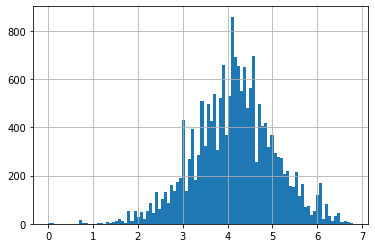

In [21]:
np.log1p(df['prices_amountmin']).hist(bins=100)
np.log1p(0)

In [23]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [30]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [28]:
np.exp(np.mean(np.log1p(y_true)))-1

62.92811169273113

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [36]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats = ['brand_cat']
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [38]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [40]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [42]:
run_model(['manufacturer_cat','brand_cat'])

(-58.539304199085976, 4.311223231615441)

In [50]:
!git add matrix_one/day4.ipynb


fatal: pathspec 'matrix_one/day4.ipynb' did not match any files


In [46]:
!git commit -m "Primitive machine learning"

[master 6c3cb88] Primitive machine learning
 1 file changed, 1 insertion(+), 1 deletion(-)


In [0]:
!git config --global user.email "kacper.tumulec4@gmail.com"
!git config --global user.name "repcaKT"